# Library Imports

In [56]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, log_loss, confusion_matrix


# Load Dataset and Data Preprocessing

In [57]:
# # Load iris dataset
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# Load credit card fraud dataset
data = pd.read_csv('creditcard.csv')

# Splitting into features and target
X = data.drop(columns=['Class'])
y = data['Class']
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Model Training

In [59]:
# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Predictions

In [60]:
# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Accuracy Metric

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# Precision, Recall, and F1-Score

In [62]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.89
Recall: 0.87
F1 Score: 0.88


# Log Loss

In [63]:
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.2f}")

Log Loss: 0.03


# Matthews Correlation Coefficient

In [64]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.2f}")

Matthews Correlation Coefficient: 0.76


# Summary

In [65]:
summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'MCC'],
    'Value': [accuracy, precision, recall, f1, loss, mcc]
})

print(summary)

      Metric     Value
0   Accuracy  0.999181
1  Precision  0.889057
2     Recall  0.868062
3   F1 Score  0.878267
4   Log Loss  0.029529
5        MCC  0.756827


# Visualization using matplotlib

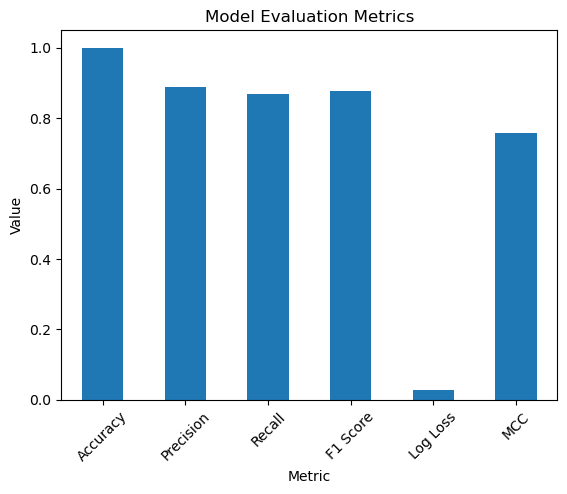

In [66]:
import matplotlib.pyplot as plt

summary.set_index('Metric').plot(kind='bar', legend=False)
plt.title("Model Evaluation Metrics")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()
